# Índice de Calidad del Aire

In [131]:
import pandas as pd
import os #Esta libreria me permite trabajar con directorios o carpetas

import numpy as np
import matplotlib.pyplot as plt

In [132]:
data_2024 = pd.read_csv(r'./Original_dataset/imeca2024.csv')

In [133]:
#Para trabajar con varios archivos csv y no agregarlos cada uno al codigo de arriba, se crea un acarpeta

carpeta = r'./Original_dataset'

In [134]:
os.listdir(carpeta)

['imeca2016.csv',
 'imeca2017.csv',
 'imeca2018.csv',
 'imeca2019.csv',
 'imeca2020.csv',
 'imeca2021.csv',
 'imeca2022.csv',
 'imeca2023.csv',
 'imeca2024.csv']

In [135]:
#Guardar cada data frame en una lista

dataframes = []


for archivo in os.listdir(carpeta):
    df = pd.read_csv(carpeta + '/'+ archivo)
    columnas_primarias = ['Fecha', 'Hora']
    zonas = ['Noroeste', 'Noreste', 'Centro', 'Suroeste', 'Sureste']
    for zona in zonas: 
        columnas_primarias.append(f'{zona} PM10')
        columnas_primarias.append(f'{zona} monóxido de carbono')
        
    df_interes = df[columnas_primarias]


    dataframes.append(df_interes)  #<---- a este punto importaria cada archivo y podriamos repetir columnas, para hacerlo màs preciso se debe escoger que columnas quiero importar


df_comb = pd.concat(dataframes,ignore_index=True,axis=0)

df_comb.to_csv('Combinado.csv', index=False) #<---- Guardar en un excel todo combinado



PermissionError: [Errno 13] Permission denied: 'Combinado.csv'

In [141]:
df = pd.read_csv('Combinado.csv')

In [142]:
df.describe()

,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
count,69323.000000,69323.000000,69264.000000,69323.000000,69264.000000,69323.000000,69264.000000,69323.000000,69264.000000,69313.000000,69264.000000
mean,12.499834,67.921296,1.977954,74.721031,3.127483,58.138078,2.607762,41.921931,0.597598,57.901663,1.633302
std,6.921911,25.043909,20.276814,31.815297,20.304285,23.530954,19.524339,19.556672,19.885728,40.724041,20.484189
min,1.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,7.000000,48.000000,4.000000,51.000000,4.000000,40.000000,4.000000,30.000000,3.000000,40.000000,4.000000
50%,12.000000,65.000000,5.000000,77.000000,5.000000,55.000000,5.000000,40.000000,4.000000,60.000000,5.000000
75%,18.000000,88.000000,7.000000,102.000000,8.000000,74.000000,8.000000,52.000000,5.000000,84.000000,7.000000
max,24.000000,142.000000,43.000000,166.000000,64.000000,140.000000,52.000000,115.000000,25.000000,132.000000,36.000000


In [143]:
#Reemplazar un número especifico, en este ejemplo el -99

df.replace(-99, np.nan, inplace=True)  #<--- en ocasiones fallan los sensores y arrojan -99

#tambien arrojan letras como fallo de lectura en los sensores

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')


#Convertir los datos de fecha a un formato de fecha que lee pandas

df['Fecha'] = pd.to_datetime(df['Fecha'], format = '%d/%m/%Y')



In [144]:
#Si quisieramos poner primero el dìa, cambio de orden

df['Fecha'] = df['Fecha'].dt.strftime('%Y-%m-%d')

In [145]:
df['Hora'] -= 1

df['Fecha_Hora'] = pd.to_datetime(df['Fecha'] + " "  + df['Hora'].astype(str) + ':00:00 ')

In [146]:
df.set_index('Fecha_Hora', inplace=True)

In [147]:
df.sort_index(inplace=True,ascending=True)

In [148]:
short_name = {
    'Noroeste PM10':'NO-PM10',
    'Noroeste monóxido de carbono':'NO-CO',
    'Noreste PM10':'NE-PM10',
    'Noreste monóxido de carbono':'NE-CO',
    'Centro PM10': 'CE-PM10',
    'Centro monóxido de carbono':'CE-CO',
    'Suroeste PM10':'SO-PM10',
    'Suroeste monóxido de carbono':'SO-CO',
    'Sureste PM10':'SE-PM10',
    'Sureste monóxido de carbono': 'SE-CO'
}

df.rename(columns=short_name,inplace=True)

In [149]:
#Como verificar y contar cuantos datos nulos hay 

df.isnull().sum()

Fecha         0
Hora          0
NO-PM10      75
NO-CO      2678
NE-PM10     425
NE-CO      2595
CE-PM10      24
CE-CO      2454
SO-PM10     288
SO-CO      2686
SE-PM10    2674
SE-CO      2759
dtype: int64

In [150]:
#Quiero una matriz de valores nulos
nulos_por_año = df.isnull().groupby(df.index.year).sum()

In [109]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [111]:
import missingno as msno

<Axes: >

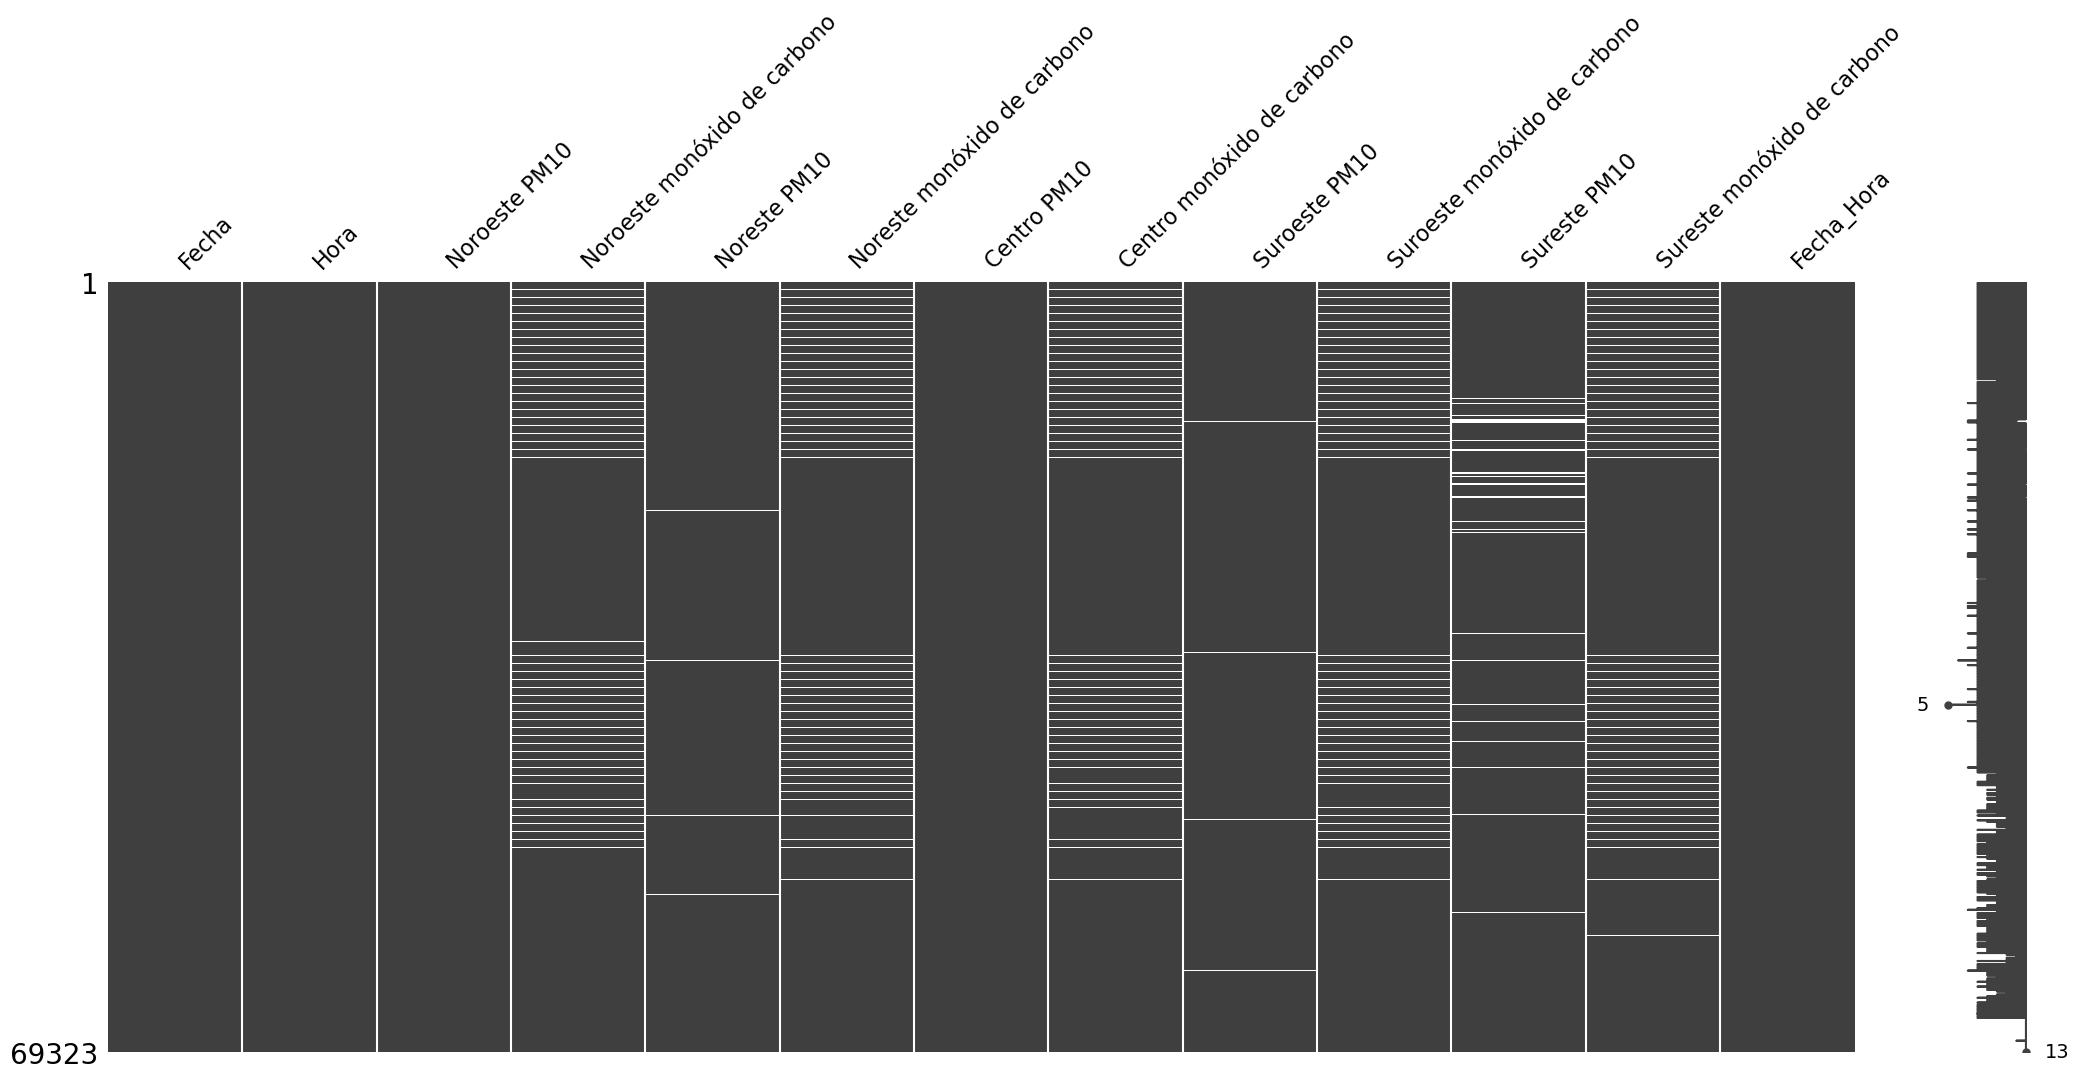

In [112]:
#Una herramienta para graficar y visualizar los datos nulos 

msno.matrix(df)  

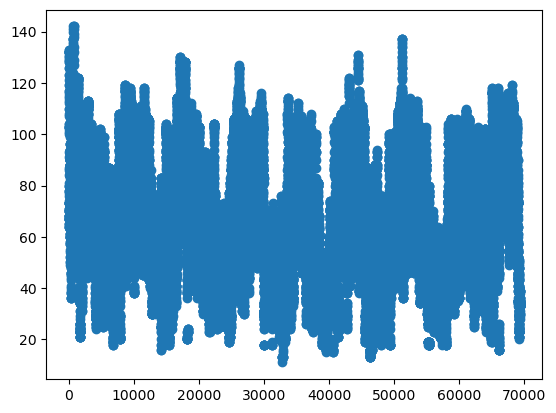

In [106]:
plt.scatter(df.index,df['Noroeste PM10'])

In [91]:
df.head()

,Fecha,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono,Fecha_Hora
0,2016-01-01,0,108.0,13.0,117.0,16.0,107.0,16.0,67.0,9.0,107.0,11.0,2016-01-01 00:00:00
1,2016-01-01,1,110.0,13.0,122.0,18.0,107.0,17.0,70.0,9.0,107.0,12.0,2016-01-01 01:00:00
2,2016-01-01,2,113.0,14.0,124.0,19.0,109.0,18.0,76.0,10.0,108.0,13.0,2016-01-01 02:00:00
3,2016-01-01,3,115.0,14.0,126.0,19.0,110.0,19.0,83.0,10.0,107.0,14.0,2016-01-01 03:00:00
4,2016-01-01,4,116.0,15.0,127.0,20.0,112.0,17.0,90.0,11.0,108.0,14.0,2016-01-01 04:00:00


In [90]:
data_2024.shape

(4331, 32)

In [151]:
def plot_time_series(df, variable, zones, ylabel, title, start_date=None, end_date=None):
    plt.figure(figsize=(15, 5))
    if start_date and end_date:
        df = df.loc[start_date:end_date]
    
    for zone in zones:
        column = f"{zone}-{variable}"
        if column in df.columns:
            plt.plot(df.index, df[column], label=column)
        else:
            print(f"Columna {column} no encontrada en el DataFrame")
    plt.xlabel('Fecha_Hora')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

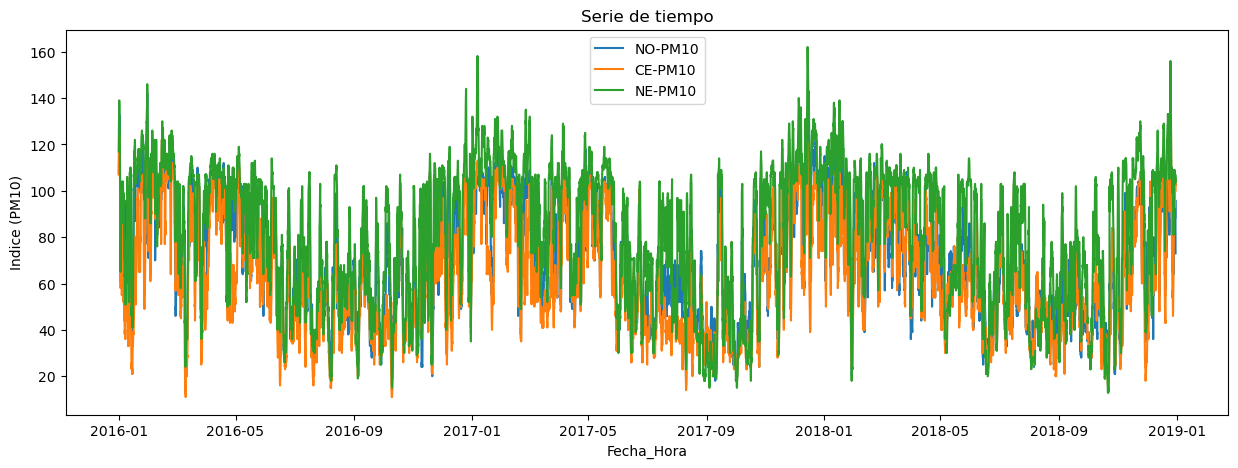

In [155]:
plot_time_series(df,'PM10',['NO','CE','NE'],'Indice (PM10)', 'Serie de tiempo', start_date='2016-01-01',end_date='2018-12-30')